In [1]:
import numpy as np
import matplotlib.pyplot as plt
from RateDistortion import *
from scipy.linalg import inv,pinv,null_space

In [2]:
R = np.array([[2,0,1],[0,2,1]])
s = np.array([[0.8,0.2],[0.2,0.8]])
px = np.array([0.2,0.3,0.5])

Qinv = np.diag(pinv(R) @ np.ones(np.shape(R)[0]))
Q = inv(Qinv)

Dxy = getFullDistortionFunction(R,s)
result = getRD(px,Dxy,numPoints=400,show_pb=True)

# line for the bound
dmin = np.min(result['Dmax_v'])
dmax = np.max(result['Dmax_v'])
L = getAvgLambdaStar(Q,px)
D_v = np.array([dmin,dmax])
B_v = hx(px) - D_v - L

In [3]:
# null space vector
v = null_space(R)[:,0]


# find the range over which adding a constant times v still gives a valid probability
a = pinv(R) @ np.ones(2)
b = v

vmin = -1*a/b
vmax = (1-a)/b
for i in range(len(vmin)):
  if v[i] < 0:
    foo = vmin[i]
    vmin[i] = vmax[i]
    vmax[i] = foo

rv = [np.max(vmin),np.min(vmax)]


In [4]:
# For what vector in the null space is $\Lambda^*$ minimized?

epsilon = 1e-3
bump_v = np.linspace(rv[0]+epsilon,rv[1]-epsilon,100)

Lmin = None

#linecount = 0
for bump in bump_v:
  Qinv = np.diag(pinv(R) @ np.ones(np.shape(R)[0]) + bump * v)
  Q = inv(Qinv)
  L = getAvgLambdaStar(Q,px)
  #D_v2 = np.array([dmin,dmax])
  B_v2 = hx(px) - D_v - L
  
  if (Lmin == None) or (Lmin['L'] > L):
    Lmin = {'L':L,'Qinv':Qinv,'bump':bump}

B_v2 = hx(px) - D_v - Lmin['L']


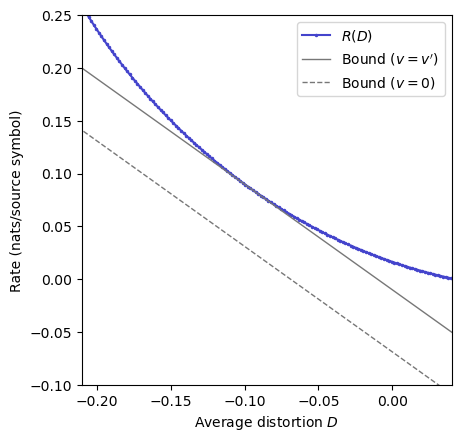

In [5]:
plt.plot(result['Dmax_v'],result['r_v'],color='#4444cc',linestyle='-',marker='.',markersize=3,
         label='$R(D)$')

B_v2 = hx(px) - D_v - Lmin['L']
plt.plot(D_v,B_v2,color='#777777',linewidth=1,label='Bound ($v = v^\prime$)')

Qinv = np.diag(pinv(R) @ np.ones(2))
Q = inv(Qinv)
LL = getAvgLambdaStar(Q,px)
B_v3 = hx(px) - D_v - LL
plt.plot(D_v,B_v3,color='#777777',linewidth=1,linestyle='--',label='Bound ($v = 0$)')

plt.legend()
plt.xlabel('Average distortion $D$')
plt.ylabel('Rate (nats/source symbol)')

plt.axis([-0.21,0.04,-0.1,0.25])

plt.gca().set_aspect(1/plt.gca().get_data_ratio())

plt.savefig('Figure4.pdf',bbox_inches='tight')